In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
x1 = np.random.normal(10, 1, 50)
y1 = np.random.normal(3, 1, 50)

x2 = np.random.normal(15, 1, 50)
y2 = np.random.normal(4, 1, 50)

xx = np.concatenate((x1, x2))
yy = np.concatenate((y1, y2))

X = np.stack((xx, yy), axis = 1)

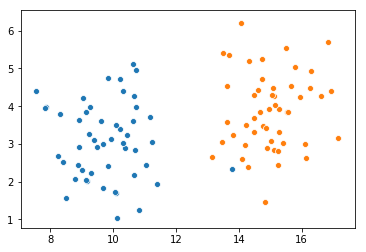

In [3]:
import seaborn as sns

sns.scatterplot(x1, y1)
sns.scatterplot(x2, y2)

In [4]:
def neighbors(x, X, r, curX):
    dist = np.sqrt(np.sum(np.square(X-x), axis = 1))
    n = np.where(dist < r)[0]
    return set(np.array(curX)[n])

def update(curX, legacylist):
    return list(set(curX).difference(legacylist))

def DBSCAN(X, r, MinPts):
    C = set()
    # find all cluster central
    curX = list(range(X.shape[0]))
    for i in range(X.shape[0]):
        n = neighbors(X[i, :], X, r, curX)
        if(len(n) > MinPts):
            C.add(i)
    
    clusters = []
    while len(curX) > 0 and len(C) > 0:
        # select one central from set
        c = C.pop()
        centers = {c}
        cluster = set()
        while len(centers) != 0:
            currentCenter = centers.pop()
            C.discard(currentCenter)
            n = neighbors(X[currentCenter, :], X[curX, :], r, curX)
            curX = update(curX, n)
            cluster.update(set(n))
            for cc in C:
                if cc != c and (cc in n):
                    centers.add(cc)
        clusters.append(set(cluster))
    return clusters

c = DBSCAN(X, 1, 10)

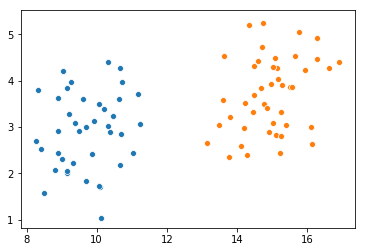

In [5]:
for i in range(len(c)):
    sns.scatterplot(X[list(c[i]), 0], X[list(c[i]), 1])